In [1472]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


from sklearn.svm import SVC

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [1473]:
from platform import python_version

print(python_version())

3.7.12


In [1474]:
pd.set_option('display.max_rows', None)

train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')
sample_submission = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

In [1475]:
train.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [1476]:
test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [1477]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [1478]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [1479]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [1480]:
planet_mapping = {"Earth": 0, "Europa": 1, "Mars": 2}

train_test = [train, test]

for dataset in train_test:
    dataset['HomePlanet'] = dataset['HomePlanet'].map(planet_mapping)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1481]:
train.head()
cabin_splitted = train['Cabin'].str.split("/", n = 2, expand = True)

train['Cabin_deck'] = cabin_splitted[0]
train['Cabin_num'] = cabin_splitted[1]
train['Cabin_side'] = cabin_splitted[2]
train = train.drop(columns = ['Cabin'])
train.head()



# train['CryoSleep'].value_counts()


# train['VIP'].value_counts()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1.0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,0.0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,1.0,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,1.0,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,0.0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


<AxesSubplot:>

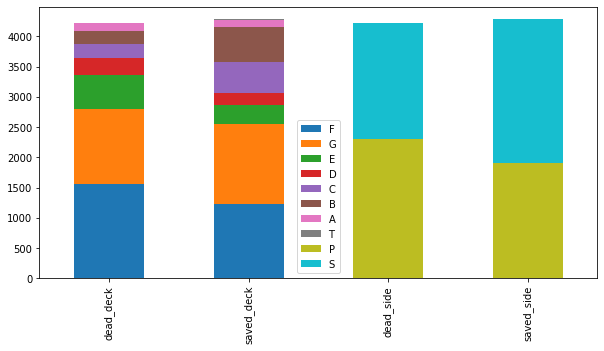

In [1482]:
dead_deck = train[train['Transported']==0]['Cabin_deck'].value_counts()
saved_deck = train[train['Transported']==1]['Cabin_deck'].value_counts()

dead_num = train[train['Transported']==0]['Cabin_num'].value_counts()
saved_num = train[train['Transported']==1]['Cabin_num'].value_counts()

dead_side = train[train['Transported']==0]['Cabin_side'].value_counts()
saved_side = train[train['Transported']==1]['Cabin_side'].value_counts()

# df = pd.DataFrame([dead_deck, saved_deck, dead_num, saved_num, dead_side, saved_side])
# df.index = ['dead_deck', 'saved_deck', 'dead_num', 'saved_num', 'dead_side', 'saved_side']

df = pd.DataFrame([dead_deck, saved_deck, dead_side, saved_side])
df.index = ['dead_deck', 'saved_deck', 'dead_side', 'saved_side']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [1483]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [1484]:
train = train.dropna()

for train_data in train:
    train['CryoSleep'] = train['CryoSleep'].astype(int)
    
# train.head()

In [1485]:
train['CryoSleep'].value_counts()

0    4274
1    2332
Name: CryoSleep, dtype: int64

In [1486]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1.0,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,0.0,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,1.0,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,1.0,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,0.0,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


<AxesSubplot:>

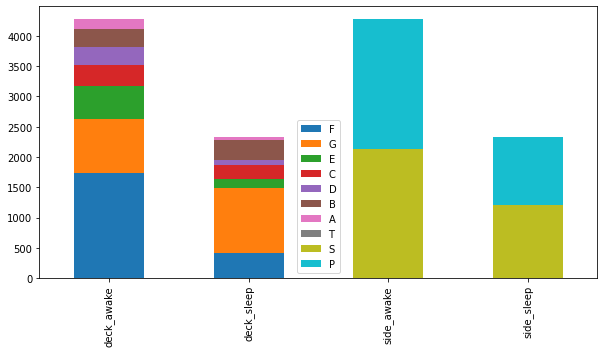

In [1487]:
deck_awake = train[train['CryoSleep']==0]['Cabin_deck'].value_counts()
deck_sleep = train[train['CryoSleep']==1]['Cabin_deck'].value_counts()
side_awake = train[train['CryoSleep']==0]['Cabin_side'].value_counts()
side_sleep = train[train['CryoSleep']==1]['Cabin_side'].value_counts()

df = pd.DataFrame([deck_awake, deck_sleep, side_awake, side_sleep])
df.index = ['deck_awake', 'deck_sleep', 'side_awake', 'side_sleep']
df.plot(kind='bar', stacked=True, figsize=(10,5))


In [1488]:
train['Cabin_deck'].value_counts()

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: Cabin_deck, dtype: int64

In [1489]:
train['Cabin_side'].value_counts()

S    3345
P    3261
Name: Cabin_side, dtype: int64

<AxesSubplot:>

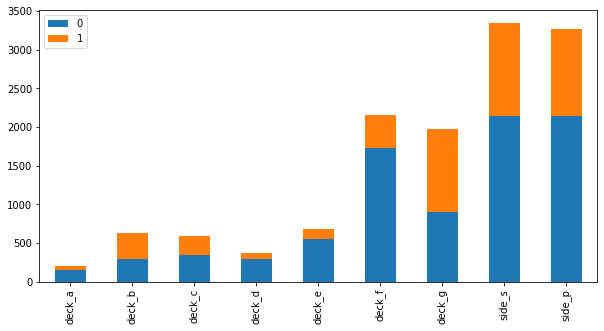

In [1490]:
# DECK F는 CryoSleep을 False로 채워도 될듯
# DECK G는 CryoSleep을 True로 채워도 될듯

deck_a = train[train['Cabin_deck']=='A']['CryoSleep'].value_counts()
deck_b = train[train['Cabin_deck']=='B']['CryoSleep'].value_counts()
deck_c = train[train['Cabin_deck']=='C']['CryoSleep'].value_counts()
deck_d = train[train['Cabin_deck']=='D']['CryoSleep'].value_counts()
deck_e = train[train['Cabin_deck']=='E']['CryoSleep'].value_counts()
deck_f = train[train['Cabin_deck']=='F']['CryoSleep'].value_counts()
deck_g = train[train['Cabin_deck']=='G']['CryoSleep'].value_counts()

side_s = train[train['Cabin_side']=='S']['CryoSleep'].value_counts()
side_p = train[train['Cabin_side']=='P']['CryoSleep'].value_counts()

df = pd.DataFrame([deck_a, deck_b, deck_c, deck_d, deck_e, deck_f, deck_g, side_s, side_p])
df.index = ['deck_a', 'deck_b', 'deck_c', 'deck_d', 'deck_e', 'deck_f', 'deck_g', 'side_s', 'side_p']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [1491]:
train.tail(100)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
8559,9139_01,2.0,0,TRAPPIST-1e,25.0,False,410.0,32.0,14.0,1239.0,10.0,Poselk Paste,False,F,1766,S
8560,9140_01,0.0,1,PSO J318.5-22,19.0,False,0.0,0.0,0.0,0.0,0.0,Eleaha Klindsayer,True,G,1488,P
8561,9141_01,1.0,1,TRAPPIST-1e,56.0,False,0.0,0.0,0.0,0.0,0.0,Alraid Valing,True,B,349,S
8562,9142_01,0.0,0,TRAPPIST-1e,18.0,False,83.0,165.0,1.0,0.0,2002.0,Thew Holson,False,F,1873,P
8563,9144_01,0.0,0,TRAPPIST-1e,22.0,False,1.0,702.0,0.0,0.0,0.0,Monard Rutler,False,F,1768,S
8564,9145_01,0.0,1,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Raulia Curton,False,G,1489,P
8565,9148_01,0.0,0,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,0.0,Elice Paulllegory,False,G,1473,S
8567,9149_02,1.0,0,55 Cancri e,22.0,False,0.0,36.0,1.0,3761.0,4521.0,Meron Dompreced,False,B,350,S
8568,9150_01,0.0,0,TRAPPIST-1e,45.0,False,1.0,0.0,638.0,9.0,161.0,Geney Schmondez,False,G,1474,S
8570,9152_01,0.0,1,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Jaimer Mirezavis,True,G,1491,P


In [1492]:
# train['Cabin_num'].value_counts()
print(train['Cabin_num'].max())
# train['Cabin_num'].min()

999


dead =>  0.0    2048
2.0     662
1.0     569
Name: HomePlanet, dtype: int64
saved =>  0.0    1518
1.0    1104
2.0     705
Name: HomePlanet, dtype: int64


<AxesSubplot:>

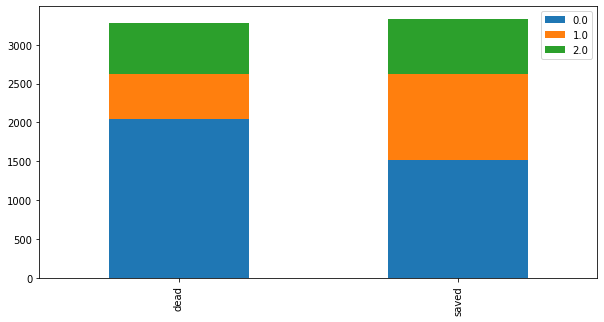

In [1493]:
# Europa 사람들이 상대적으로 좀 더 높은 확률로 살았고, Earth 사람들이 상대적으로 높은 확률로 죽은듯

dead = train[train['Transported']==0]['HomePlanet'].value_counts()
saved = train[train['Transported']==1]['HomePlanet'].value_counts()

print('dead => ', dead)
print('saved => ', saved)


df = pd.DataFrame([dead, saved])
df.index = ['dead', 'saved']
df.plot(kind='bar', stacked=True, figsize=(10,5))

Earth =>  False    2048
True     1518
Name: Transported, dtype: int64
Europa =>  True     1104
False     569
Name: Transported, dtype: int64
Mars =>  True     705
False    662
Name: Transported, dtype: int64


<AxesSubplot:>

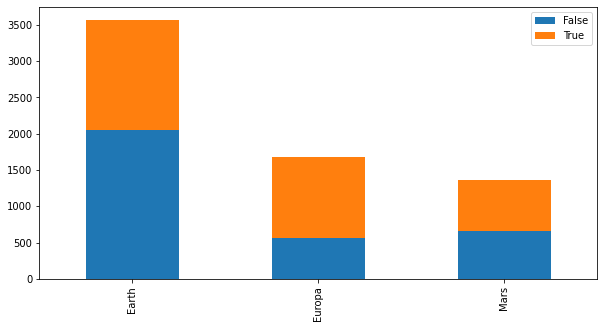

In [1494]:
# "Earth": 0, "Europa": 1, "Mars": 2

Earth = train[train['HomePlanet']==0]['Transported'].value_counts()
Europa = train[train['HomePlanet']==1]['Transported'].value_counts()
Mars = train[train['HomePlanet']==2]['Transported'].value_counts()

print('Earth => ', Earth)
print('Europa => ', Europa)
print('Mars => ', Mars)

df = pd.DataFrame([Earth, Europa, Mars])
df.index = ['Earth', 'Europa', 'Mars']
df.plot(kind='bar', stacked=True, figsize=(10,5))

<AxesSubplot:>

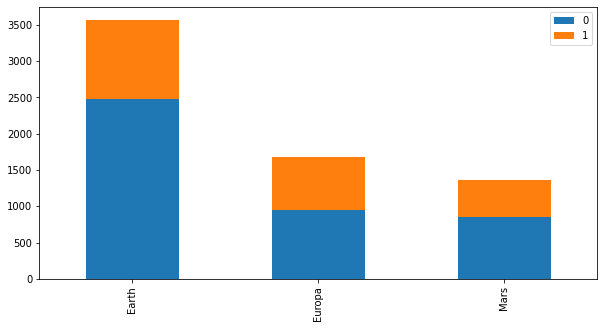

In [1495]:
# "Earth": 0, "Europa": 1, "Mars": 2
# Earth는 CryoSleep을 False로 채워도 될듯

Earth = train[train['HomePlanet']==0]['CryoSleep'].value_counts()
Europa = train[train['HomePlanet']==1]['CryoSleep'].value_counts()
Mars = train[train['HomePlanet']==2]['CryoSleep'].value_counts()

df = pd.DataFrame([Earth, Europa, Mars])
df.index = ['Earth', 'Europa', 'Mars']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [1496]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1.0,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,0.0,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,1.0,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,1.0,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,0.0,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [1497]:
train = train.drop('Name', axis=1)

In [1498]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1.0,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,0.0,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,1.0,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,1.0,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,0.0,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [1499]:
train['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [1500]:
destination_mapping = {"TRAPPIST-1e": 0, "55 Cancri e": 1, "PSO J318.5-22": 2}

train_test = [train, test]

for dataset in train_test:
    dataset['Destination'] = dataset['Destination'].map(destination_mapping)

In [1501]:
train.head(20)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1.0,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,0.0,0,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,1.0,0,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,1.0,0,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,0.0,0,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
5,0005_01,0.0,0,2,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,0,P
6,0006_01,0.0,0,0,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,F,2,S
8,0007_01,0.0,0,0,35.0,False,0.0,785.0,17.0,216.0,0.0,True,F,3,S
9,0008_01,1.0,1,1,14.0,False,0.0,0.0,0.0,0.0,0.0,True,B,1,P
11,0008_03,1.0,0,1,45.0,False,39.0,7295.0,589.0,110.0,124.0,True,B,1,P


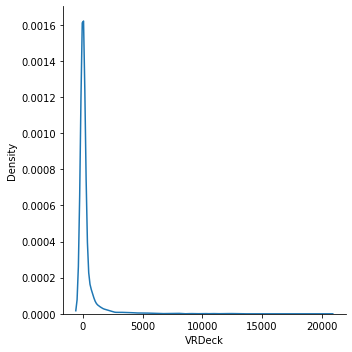

In [1502]:
import seaborn as sns

sns.displot(data = train['VRDeck'], kind="kde")

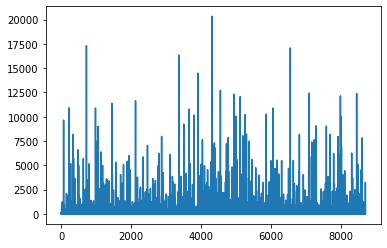

In [1503]:
import matplotlib.pyplot as plt

plt.plot(train['VRDeck'])
plt.show()

In [1504]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1.0,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,0.0,0,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,1.0,0,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,1.0,0,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,0.0,0,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


(0.0, 21000.0, 0.0, 2.0)

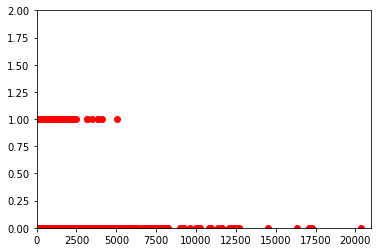

In [1505]:
plt.plot(train['VRDeck'], train['Transported'], 'ro')
plt.axis([0, 21000, 0, 2])

In [1506]:
# train['VRDeck'].value_counts().sort_index()

<AxesSubplot:>

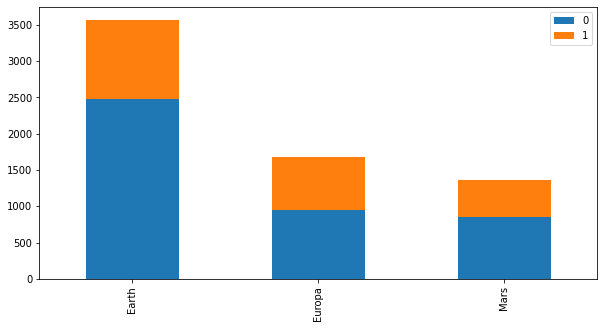

In [1507]:
# "Earth": 0, "Europa": 1, "Mars": 2
# Earth는 CryoSleep을 False로 채워도 될듯

Earth = train[train['HomePlanet']==0]['CryoSleep'].value_counts()
Europa = train[train['HomePlanet']==1]['CryoSleep'].value_counts()
Mars = train[train['HomePlanet']==2]['CryoSleep'].value_counts()

df = pd.DataFrame([Earth, Europa, Mars])
df.index = ['Earth', 'Europa', 'Mars']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [1508]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 1, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 1) & (dataset['Age'] <= 3), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 3) & (dataset['Age'] <= 7), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 7) & (dataset['Age'] <= 10), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 13), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 13) & (dataset['Age'] <= 14), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 15), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 16), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 19), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 22), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 26), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 12
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 13

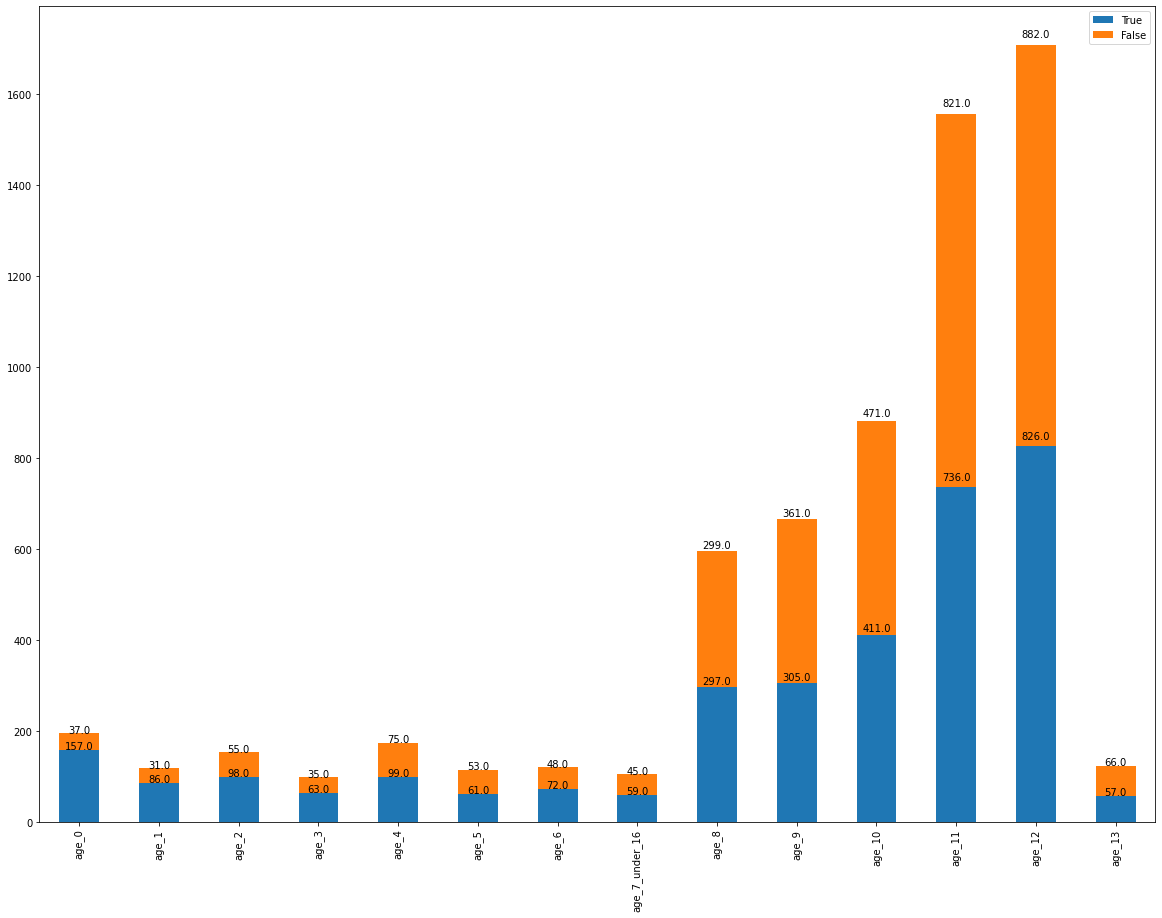

In [1509]:
# Age 16세 이하는 살 확률이 높지만 나머지 연령대는 죽을 확률이 높음

saved = train[train['Transported']==1]['Age'].value_counts()
dead = train[train['Transported']==0]['Age'].value_counts()

age_0 = train[train['Age'] == 0]['Transported'].value_counts()
age_1 = train[train['Age'] == 1]['Transported'].value_counts()
age_2 = train[train['Age'] == 2]['Transported'].value_counts()
age_3 = train[train['Age'] == 3]['Transported'].value_counts()
age_4 = train[train['Age'] == 4]['Transported'].value_counts()
age_5 = train[train['Age'] == 5]['Transported'].value_counts()
age_6 = train[train['Age'] == 6]['Transported'].value_counts()
age_7 = train[train['Age'] == 7]['Transported'].value_counts()
age_8 = train[train['Age'] == 8]['Transported'].value_counts()
age_9 = train[train['Age'] == 9]['Transported'].value_counts()
age_10 = train[train['Age'] == 10]['Transported'].value_counts()
age_11 = train[train['Age'] == 11]['Transported'].value_counts()
age_12 = train[train['Age'] == 12]['Transported'].value_counts()
age_13 = train[train['Age'] == 13]['Transported'].value_counts()

df = pd.DataFrame([age_0, age_1, age_2, age_3, age_4, age_5, age_6, age_7, age_8, age_9, age_10, age_11, age_12, age_13])
df.index = ['age_0', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7_under_16', 
            'age_8', 'age_9', 'age_10', 'age_11', 'age_12' , 'age_13']
ax = df.plot(kind='bar', stacked=True, figsize=(20,15))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

In [1510]:
train.rename(columns = {'Age' : 'Age_Level'}, inplace=True)
test.rename(columns = {'Age' : 'Age_Level'}, inplace=True)

In [1511]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Luxury_sum'] = dataset['RoomService'] + dataset['FoodCourt'] + dataset['ShoppingMall'] + dataset['Spa'] + dataset['VRDeck']
    
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age_Level,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,Luxury_sum
0,0001_01,1.0,0,0,12.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0.0
1,0002_01,0.0,0,0,10.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,736.0
2,0003_01,1.0,0,0,12.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,10383.0
3,0003_02,1.0,0,0,11.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,5176.0
4,0004_01,0.0,0,0,7.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1091.0
5,0005_01,0.0,0,2,12.0,False,0.0,483.0,0.0,291.0,0.0,True,F,0,P,774.0
6,0006_01,0.0,0,0,10.0,False,42.0,1539.0,3.0,0.0,0.0,True,F,2,S,1584.0
8,0007_01,0.0,0,0,11.0,False,0.0,785.0,17.0,216.0,0.0,True,F,3,S,1018.0
9,0008_01,1.0,1,1,5.0,False,0.0,0.0,0.0,0.0,0.0,True,B,1,P,0.0
11,0008_03,1.0,0,1,12.0,False,39.0,7295.0,589.0,110.0,124.0,True,B,1,P,8157.0


In [1512]:
train_test_data = [train, test]

for col in ['Luxury_sum', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    for dataset in train_test_data:
        dataset.loc[ dataset[col] <= 0, col] = 0
        dataset.loc[(dataset[col] > 0) & (dataset[col] <= 1), col] = 1
        dataset.loc[(dataset[col] > 1) & (dataset[col] <= 3), col] = 2
        dataset.loc[(dataset[col] > 3) & (dataset[col] <= 5), col] = 3       
        dataset.loc[(dataset[col] > 5) & (dataset[col] <= 7), col] = 4
        dataset.loc[(dataset[col] > 7) & (dataset[col] <= 10), col] = 5
        dataset.loc[(dataset[col] > 10) & (dataset[col] <= 100), col] = 6
        dataset.loc[(dataset[col] > 100) & (dataset[col] <= 1000), col] = 7
        dataset.loc[(dataset[col] > 1000) & (dataset[col] <= 10000), col] = 8
        dataset.loc[(dataset[col] > 10000) & (dataset[col] <= 30000), col] = 9
        dataset.loc[(dataset[col] > 30000) & (dataset[col] <= 50000), col] = 10
        dataset.loc[(dataset[col] > 50000) & (dataset[col] <= 100000), col] = 11
        dataset.loc[ dataset[col] > 100000, col] = 12

train.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age_Level,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,Luxury_sum
0,0001_01,1.0,0,0,12.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0.0
1,0002_01,0.0,0,0,10.0,False,7.0,5.0,6.0,7.0,6.0,True,F,0,S,7.0
2,0003_01,1.0,0,0,12.0,True,6.0,8.0,0.0,8.0,6.0,False,A,0,S,9.0
3,0003_02,1.0,0,0,11.0,False,0.0,8.0,7.0,8.0,7.0,False,A,0,S,8.0
4,0004_01,0.0,0,0,7.0,False,7.0,6.0,7.0,7.0,2.0,True,F,1,S,8.0
5,0005_01,0.0,0,2,12.0,False,0.0,7.0,0.0,7.0,0.0,True,F,0,P,7.0
6,0006_01,0.0,0,0,10.0,False,6.0,8.0,2.0,0.0,0.0,True,F,2,S,8.0
8,0007_01,0.0,0,0,11.0,False,0.0,7.0,6.0,7.0,0.0,True,F,3,S,8.0
9,0008_01,1.0,1,1,5.0,False,0.0,0.0,0.0,0.0,0.0,True,B,1,P,0.0
11,0008_03,1.0,0,1,12.0,False,6.0,8.0,7.0,7.0,7.0,True,B,1,P,8.0


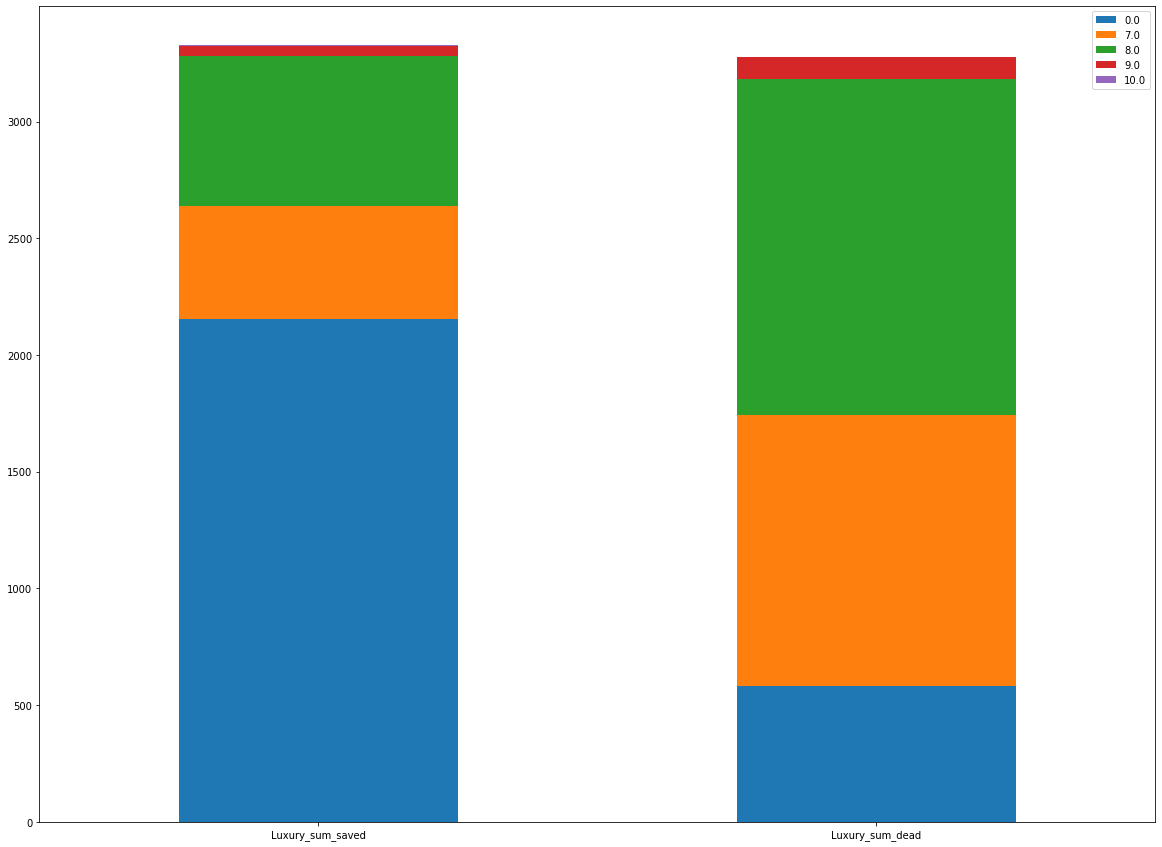

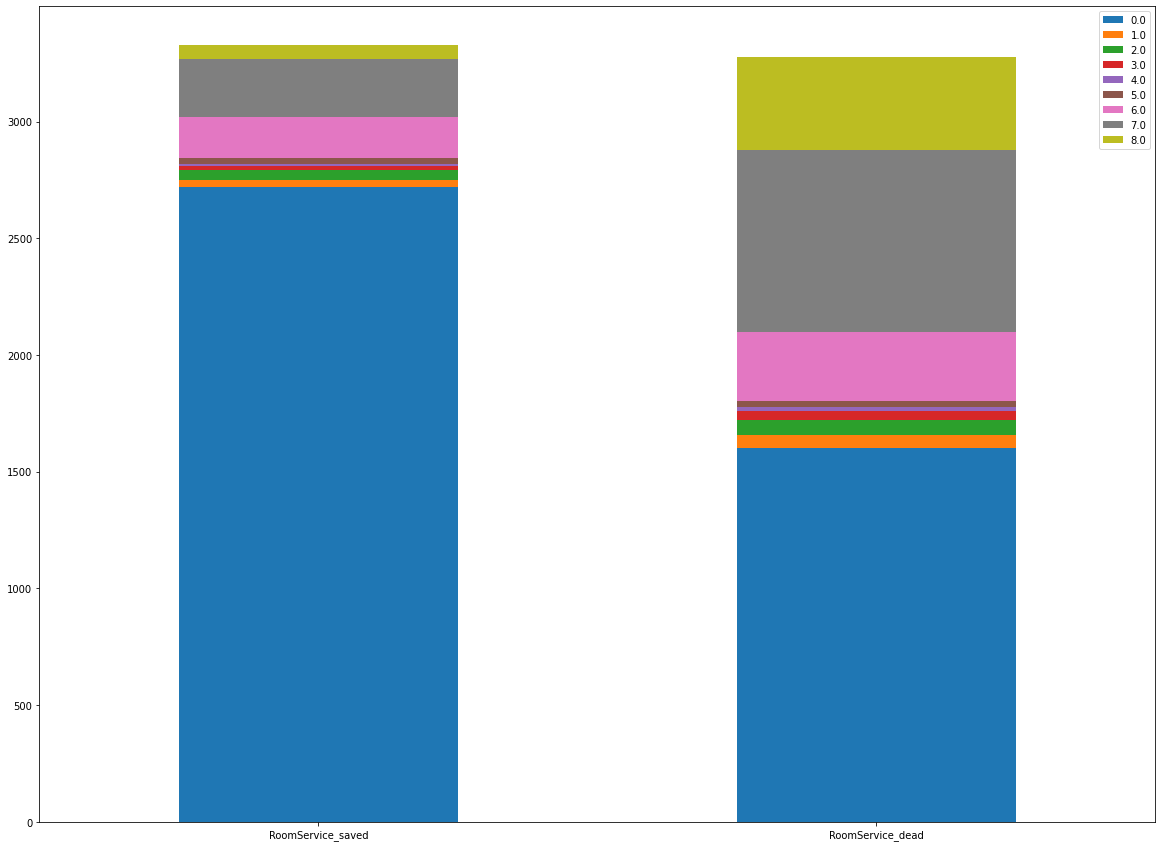

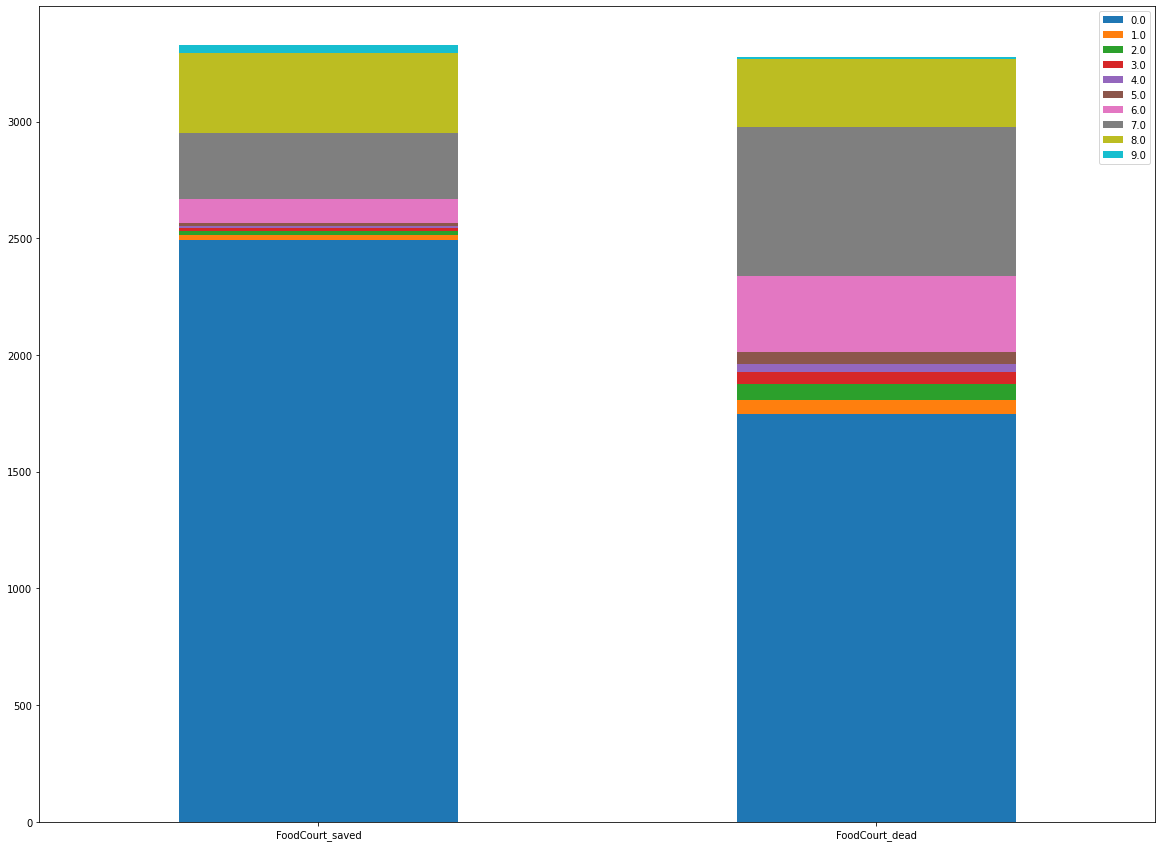

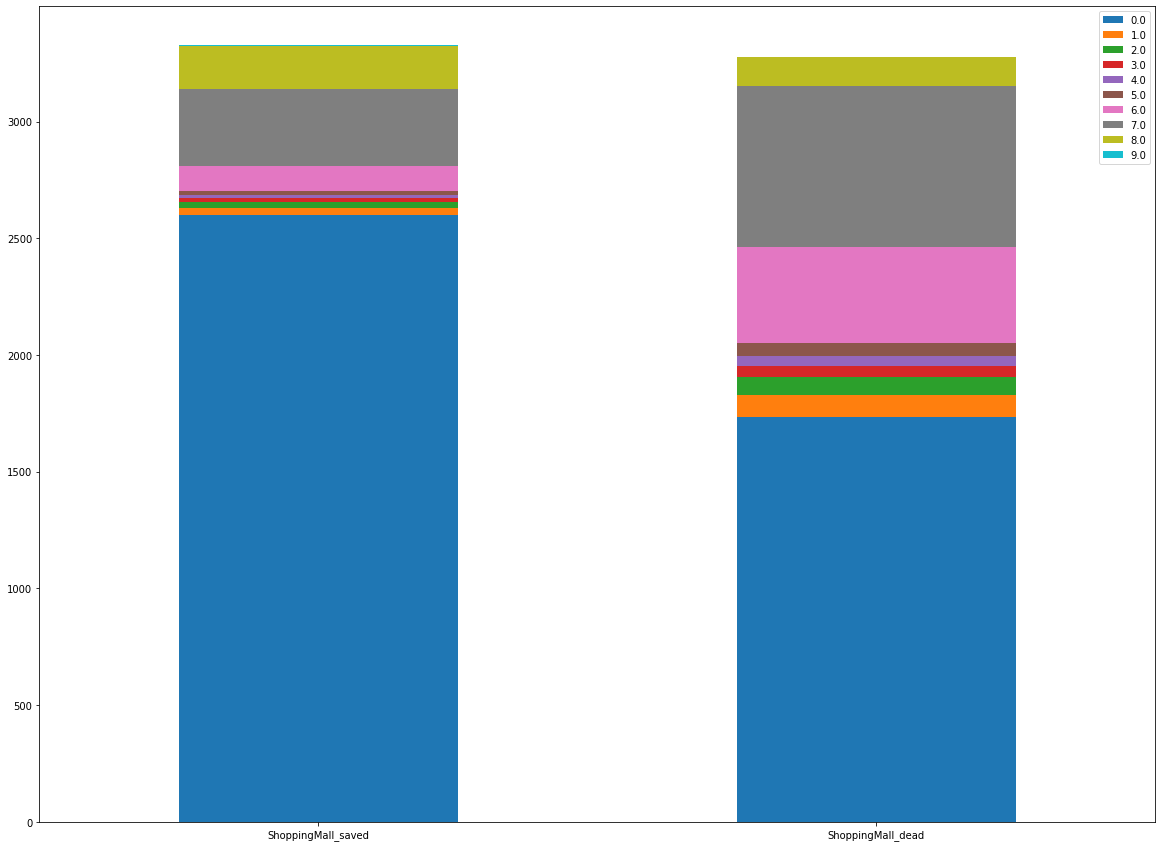

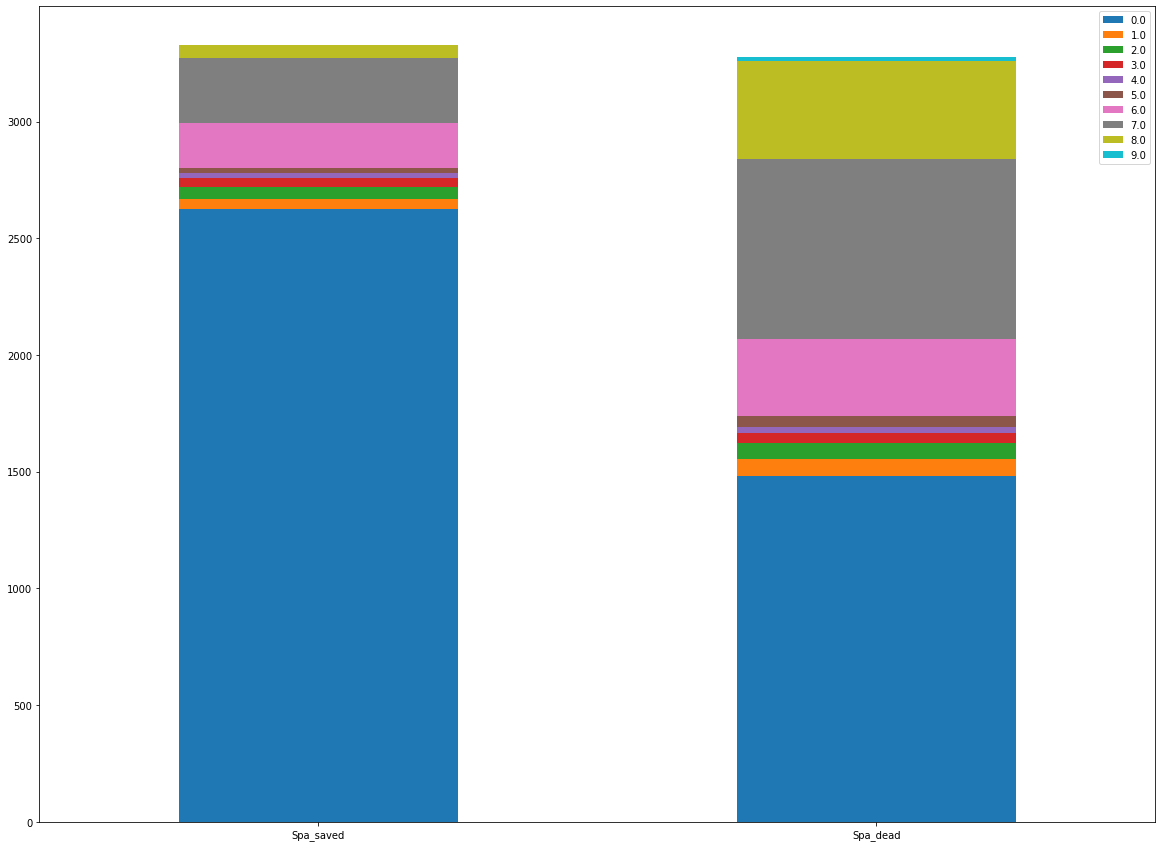

In [1513]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 이 0인 사람들이 살아남을 확률이 높고 나머지는 적음
# 이 모든 값들을 합친 Luxury_sum이 0인 사람들은 살아남을 확률이 더 높게 나옴 -> Luxury_sum == 0 이면 살아있는 경향이 개별 Luxury 들이 0일 때보다 높음
# 결론적으로 Luxury_sum == 0 이면 살았다고 예측해야 함

for col in ['Luxury_sum', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']:
    saved = train[train['Transported']==1][col].value_counts()
    dead = train[train['Transported']==0][col].value_counts()
    
    df = pd.DataFrame([saved, dead])
    df.index = [col + '_saved', col + '_dead']
    df.plot(kind='bar', stacked=True, figsize=(20,15), rot=0)